In [3]:
import math
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import text, sequence
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical     
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score         

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
222/222 [==============================] - 2s 6ms/step - loss: 0.0874 - mse: 0.0874 - mae: 0.2365 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.1027
Epoch 2/200
222/222 [==============================] - 1s 5ms/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0951 - val_loss: 0.0052 - val_mse: 0.0052 - val_mae: 0.0592
Epoch 3/200
222/222 [==============================] - 

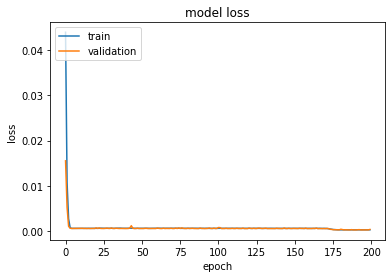

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Score with  0.9602356192243611


In [4]:
# read the dataset
X_train = pd.read_csv('input_data/train_data.txt', sep = "\t").values
Y_train = pd.read_csv('input_data/train_truth.txt').values
X_test = pd.read_csv('input_data/test_data.txt', sep = "\t").values

# seprate train set and validate set
n = len(Y_train)
train_size = (math.ceil(n * 0.177))
x_validate = X_train[train_size:,:]
x_train = X_train[:train_size,:]
y_validate = Y_train[train_size:,:]
y_train = Y_train[:train_size,:]

# construct the model
model = Sequential()
model.add(Dense(4, input_dim = 3, kernel_initializer = 'normal', activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "linear"))

# compile the model
model.compile(loss = "mse", optimizer = "adam", metrics = ['mse', 'mae'])
print(model.summary())

# train the model
history = model.fit(x = x_train, 
                    y = y_train, 
                    validation_data = (x_validate, y_validate),
                    epochs = 200, 
                    batch_size = 8)

# make prediction with the model
preds = model.predict(X_test).flatten()

# plot the validation lost
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# compare result with pre-loaded MLPRegressor from sklearn
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
reg = MLPRegressor(hidden_layer_sizes = (4, 4), activation = "relu", random_state = 1, max_iter = 2000).fit(X_trainscaled, Y_train)
y_pred=reg.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, preds)))

# output the result
result = {'y':preds}
df = pd.DataFrame(result)
df.to_csv('output_data/test_predicted.txt', index = False)  